In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.utils import check_random_state
from FFNN import FFNN


In [3]:
# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

Sparsity with L1 penalty: 75.10%
Test score with L1 penalty: 0.8254
Example run in 8.765 s


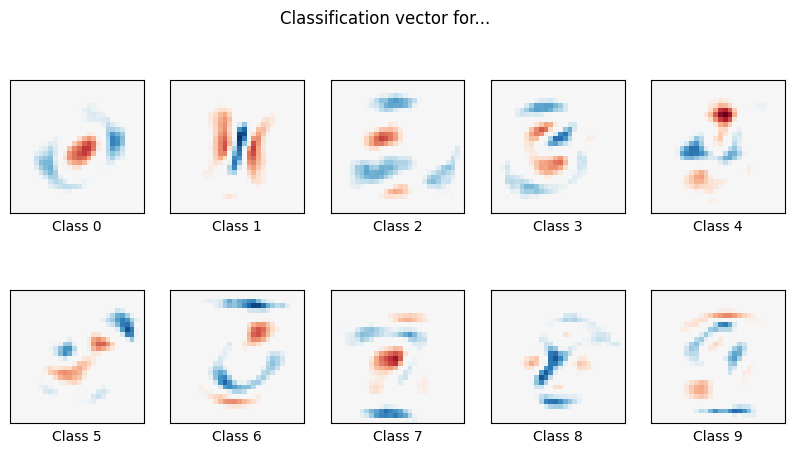

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

## Depth Variation

Epoch 1/20 - Train Loss: 1.9558 - Val Loss: 2.0075
Epoch 2/20 - Train Loss: 1.6113 - Val Loss: 1.7018
Epoch 3/20 - Train Loss: 1.3208 - Val Loss: 1.4508
Epoch 4/20 - Train Loss: 1.1183 - Val Loss: 1.2698
Epoch 5/20 - Train Loss: 0.9455 - Val Loss: 1.1045
Epoch 6/20 - Train Loss: 0.8119 - Val Loss: 0.9857
Epoch 7/20 - Train Loss: 0.7255 - Val Loss: 0.9082
Epoch 8/20 - Train Loss: 0.6563 - Val Loss: 0.8515
Epoch 9/20 - Train Loss: 0.5961 - Val Loss: 0.7943
Epoch 10/20 - Train Loss: 0.5566 - Val Loss: 0.7619
Epoch 11/20 - Train Loss: 0.5126 - Val Loss: 0.7199
Epoch 12/20 - Train Loss: 0.4797 - Val Loss: 0.6908
Epoch 13/20 - Train Loss: 0.4519 - Val Loss: 0.6649
Epoch 14/20 - Train Loss: 0.4237 - Val Loss: 0.6489
Epoch 15/20 - Train Loss: 0.4053 - Val Loss: 0.6343
Epoch 16/20 - Train Loss: 0.3811 - Val Loss: 0.6141
Epoch 17/20 - Train Loss: 0.3644 - Val Loss: 0.6071
Epoch 18/20 - Train Loss: 0.3493 - Val Loss: 0.5926
Epoch 19/20 - Train Loss: 0.3337 - Val Loss: 0.5822
Epoch 20/20 - Train L

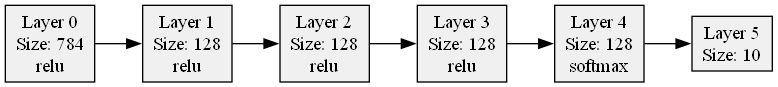

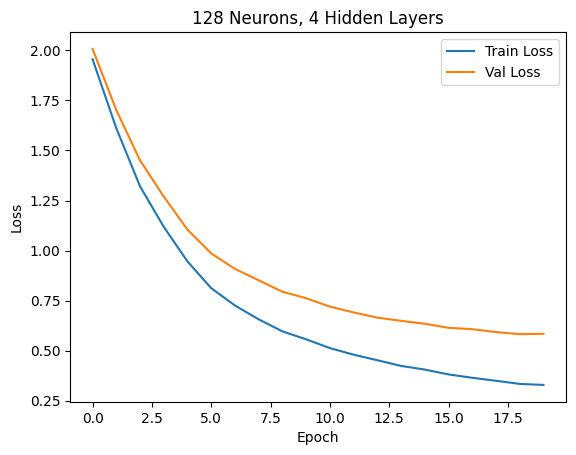

Epoch 1/20 - Train Loss: 1.9020 - Val Loss: 1.9779
Epoch 2/20 - Train Loss: 1.5513 - Val Loss: 1.6706
Epoch 3/20 - Train Loss: 1.2996 - Val Loss: 1.4429
Epoch 4/20 - Train Loss: 1.1139 - Val Loss: 1.2718
Epoch 5/20 - Train Loss: 0.9723 - Val Loss: 1.1320
Epoch 6/20 - Train Loss: 0.8591 - Val Loss: 1.0277
Epoch 7/20 - Train Loss: 0.7766 - Val Loss: 0.9501
Epoch 8/20 - Train Loss: 0.7086 - Val Loss: 0.8804
Epoch 9/20 - Train Loss: 0.6522 - Val Loss: 0.8220
Epoch 10/20 - Train Loss: 0.6064 - Val Loss: 0.7789
Epoch 11/20 - Train Loss: 0.5662 - Val Loss: 0.7381
Epoch 12/20 - Train Loss: 0.5323 - Val Loss: 0.7013
Epoch 13/20 - Train Loss: 0.5023 - Val Loss: 0.6750
Epoch 14/20 - Train Loss: 0.4758 - Val Loss: 0.6533
Epoch 15/20 - Train Loss: 0.4536 - Val Loss: 0.6333
Epoch 16/20 - Train Loss: 0.4317 - Val Loss: 0.6122
Epoch 17/20 - Train Loss: 0.4130 - Val Loss: 0.5978
Epoch 18/20 - Train Loss: 0.3959 - Val Loss: 0.5820
Epoch 19/20 - Train Loss: 0.3802 - Val Loss: 0.5640
Epoch 20/20 - Train L

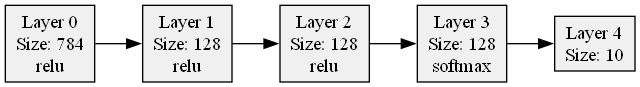

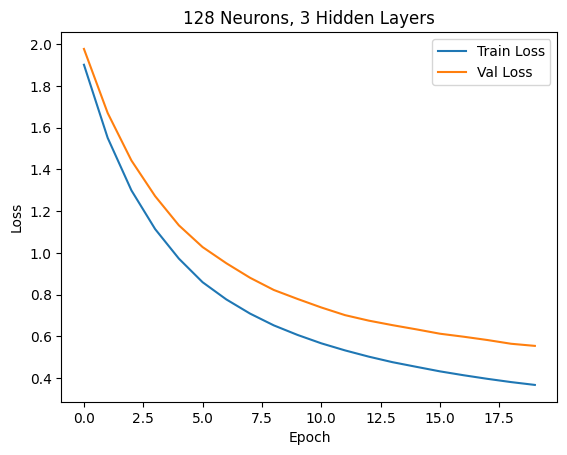

Epoch 1/20 - Train Loss: 15.5087 - Val Loss: 15.8125
Epoch 2/20 - Train Loss: 16.7086 - Val Loss: 17.3132
Epoch 3/20 - Train Loss: 17.9796 - Val Loss: 18.3008
Epoch 4/20 - Train Loss: 19.5607 - Val Loss: 19.3824
Epoch 5/20 - Train Loss: 20.4850 - Val Loss: 20.6095
Epoch 6/20 - Train Loss: 21.3766 - Val Loss: 21.4516
Epoch 7/20 - Train Loss: 22.1495 - Val Loss: 22.6363
Epoch 8/20 - Train Loss: 22.8028 - Val Loss: 23.3081
Epoch 9/20 - Train Loss: 23.2889 - Val Loss: 23.8381
Epoch 10/20 - Train Loss: 23.8310 - Val Loss: 24.2553
Epoch 11/20 - Train Loss: 24.2885 - Val Loss: 24.4847
Epoch 12/20 - Train Loss: 24.7547 - Val Loss: 25.0140
Epoch 13/20 - Train Loss: 25.1308 - Val Loss: 25.2457
Epoch 14/20 - Train Loss: 25.4158 - Val Loss: 25.6620
Epoch 15/20 - Train Loss: 25.7121 - Val Loss: 26.1154
Epoch 16/20 - Train Loss: 26.0537 - Val Loss: 26.4523
Epoch 17/20 - Train Loss: 26.3286 - Val Loss: 26.9034
Epoch 18/20 - Train Loss: 26.6143 - Val Loss: 27.2249
Epoch 19/20 - Train Loss: 26.9267 - V

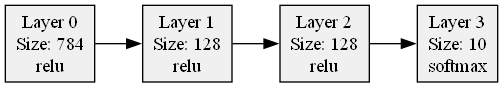

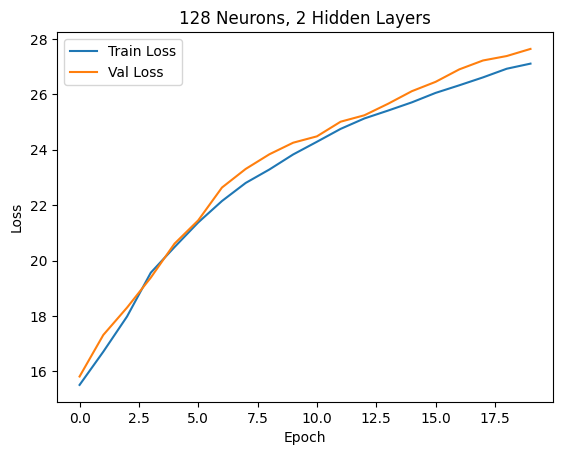

In [7]:
## Variasi depth FFNN
# 4 hidden layer
# ==============================
layer_sizes = [784, 128, 128, 128, 128, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 4 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0

# 3 hidden layer
# ==============================
layer_sizes = [784, 128, 128, 128, 10]
activations = ['relu', 'relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 3 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0

# 2 hidden layer
# ==============================
layer_sizes = [784, 128, 128, 10]
activations = ['relu', 'relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 2 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0

## Width Variation

Epoch 1/20 - Train Loss: 1.9558 - Val Loss: 2.0075
Epoch 2/20 - Train Loss: 1.6113 - Val Loss: 1.7018
Epoch 3/20 - Train Loss: 1.3208 - Val Loss: 1.4508
Epoch 4/20 - Train Loss: 1.1183 - Val Loss: 1.2698
Epoch 5/20 - Train Loss: 0.9455 - Val Loss: 1.1045
Epoch 6/20 - Train Loss: 0.8119 - Val Loss: 0.9857
Epoch 7/20 - Train Loss: 0.7255 - Val Loss: 0.9082
Epoch 8/20 - Train Loss: 0.6563 - Val Loss: 0.8515
Epoch 9/20 - Train Loss: 0.5961 - Val Loss: 0.7943
Epoch 10/20 - Train Loss: 0.5566 - Val Loss: 0.7619
Epoch 11/20 - Train Loss: 0.5126 - Val Loss: 0.7199
Epoch 12/20 - Train Loss: 0.4797 - Val Loss: 0.6908
Epoch 13/20 - Train Loss: 0.4519 - Val Loss: 0.6649
Epoch 14/20 - Train Loss: 0.4237 - Val Loss: 0.6489
Epoch 15/20 - Train Loss: 0.4053 - Val Loss: 0.6343
Epoch 16/20 - Train Loss: 0.3811 - Val Loss: 0.6141
Epoch 17/20 - Train Loss: 0.3644 - Val Loss: 0.6071
Epoch 18/20 - Train Loss: 0.3493 - Val Loss: 0.5926
Epoch 19/20 - Train Loss: 0.3337 - Val Loss: 0.5822
Epoch 20/20 - Train L

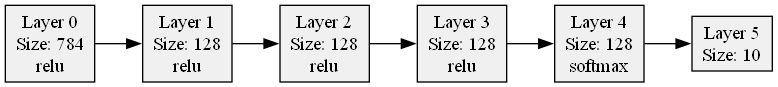

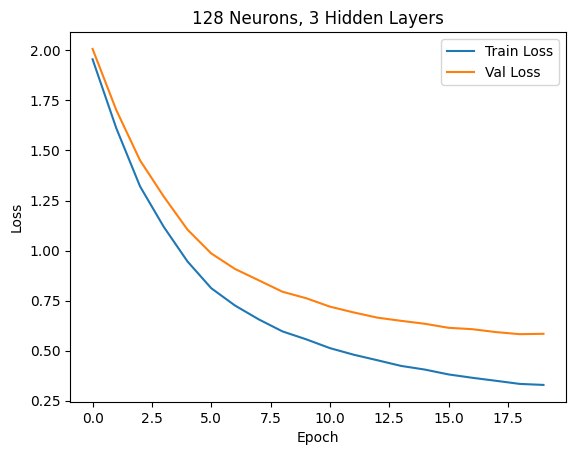

Epoch 1/20 - Train Loss: 2.3053 - Val Loss: 2.3120
Epoch 2/20 - Train Loss: 2.2700 - Val Loss: 2.2800
Epoch 3/20 - Train Loss: 2.2307 - Val Loss: 2.2452
Epoch 4/20 - Train Loss: 2.1826 - Val Loss: 2.2033
Epoch 5/20 - Train Loss: 2.1220 - Val Loss: 2.1503
Epoch 6/20 - Train Loss: 2.0436 - Val Loss: 2.0839
Epoch 7/20 - Train Loss: 1.9493 - Val Loss: 2.0041
Epoch 8/20 - Train Loss: 1.8431 - Val Loss: 1.9162
Epoch 9/20 - Train Loss: 1.7318 - Val Loss: 1.8228
Epoch 10/20 - Train Loss: 1.6188 - Val Loss: 1.7254
Epoch 11/20 - Train Loss: 1.5054 - Val Loss: 1.6251
Epoch 12/20 - Train Loss: 1.3946 - Val Loss: 1.5257
Epoch 13/20 - Train Loss: 1.2874 - Val Loss: 1.4251
Epoch 14/20 - Train Loss: 1.1846 - Val Loss: 1.3270
Epoch 15/20 - Train Loss: 1.0928 - Val Loss: 1.2353
Epoch 16/20 - Train Loss: 1.0085 - Val Loss: 1.1588
Epoch 17/20 - Train Loss: 0.9353 - Val Loss: 1.0829
Epoch 18/20 - Train Loss: 0.8724 - Val Loss: 1.0227
Epoch 19/20 - Train Loss: 0.8178 - Val Loss: 0.9665
Epoch 20/20 - Train L

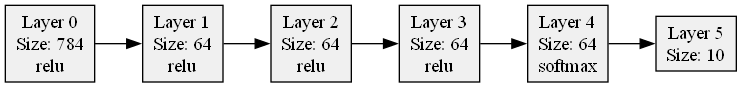

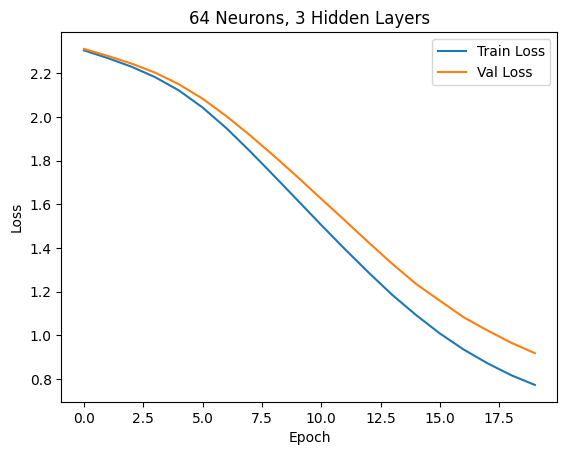

Epoch 1/20 - Train Loss: 2.3017 - Val Loss: 2.3034
Epoch 2/20 - Train Loss: 2.2992 - Val Loss: 2.3013
Epoch 3/20 - Train Loss: 2.2967 - Val Loss: 2.2991
Epoch 4/20 - Train Loss: 2.2940 - Val Loss: 2.2968
Epoch 5/20 - Train Loss: 2.2912 - Val Loss: 2.2943
Epoch 6/20 - Train Loss: 2.2882 - Val Loss: 2.2917
Epoch 7/20 - Train Loss: 2.2850 - Val Loss: 2.2889
Epoch 8/20 - Train Loss: 2.2814 - Val Loss: 2.2859
Epoch 9/20 - Train Loss: 2.2776 - Val Loss: 2.2826
Epoch 10/20 - Train Loss: 2.2733 - Val Loss: 2.2790
Epoch 11/20 - Train Loss: 2.2686 - Val Loss: 2.2750
Epoch 12/20 - Train Loss: 2.2633 - Val Loss: 2.2703
Epoch 13/20 - Train Loss: 2.2572 - Val Loss: 2.2649
Epoch 14/20 - Train Loss: 2.2502 - Val Loss: 2.2587
Epoch 15/20 - Train Loss: 2.2421 - Val Loss: 2.2514
Epoch 16/20 - Train Loss: 2.2327 - Val Loss: 2.2429
Epoch 17/20 - Train Loss: 2.2218 - Val Loss: 2.2330
Epoch 18/20 - Train Loss: 2.2089 - Val Loss: 2.2213
Epoch 19/20 - Train Loss: 2.1934 - Val Loss: 2.2073
Epoch 20/20 - Train L

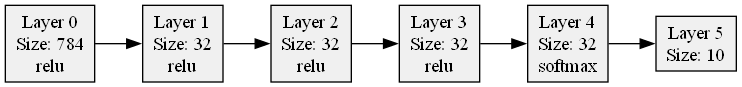

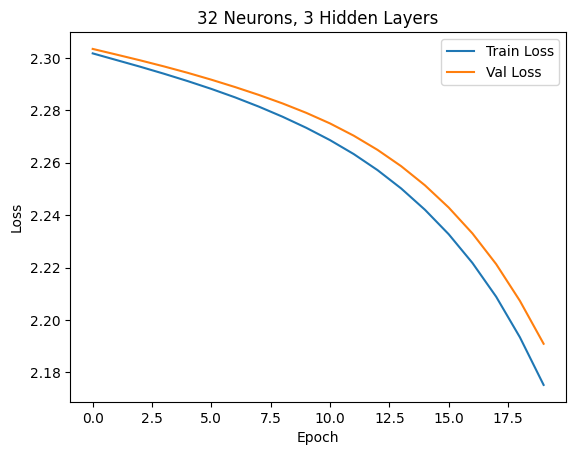

In [8]:
## Variasi width FFNN
# 128 neuron
# ==============================
layer_sizes = [784, 128, 128, 128, 128, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 3 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0

# 64 neuron
# ==============================
layer_sizes = [784, 64, 64, 64, 64, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('64 Neurons, 3 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0

# 32 neuron
# ==============================
layer_sizes = [784, 32, 32, 32, 32, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('32 Neurons, 3 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0

## Activation Function Variation

Epoch 1/20 - Train Loss: 2.0889 - Val Loss: 2.1682
Epoch 2/20 - Train Loss: 1.7621 - Val Loss: 1.8657
Epoch 3/20 - Train Loss: 1.5136 - Val Loss: 1.6377
Epoch 4/20 - Train Loss: 1.3209 - Val Loss: 1.4591
Epoch 5/20 - Train Loss: 1.1748 - Val Loss: 1.3223
Epoch 6/20 - Train Loss: 1.0613 - Val Loss: 1.2117
Epoch 7/20 - Train Loss: 0.9712 - Val Loss: 1.1220
Epoch 8/20 - Train Loss: 0.8967 - Val Loss: 1.0478
Epoch 9/20 - Train Loss: 0.8348 - Val Loss: 0.9845
Epoch 10/20 - Train Loss: 0.7822 - Val Loss: 0.9303
Epoch 11/20 - Train Loss: 0.7372 - Val Loss: 0.8830
Epoch 12/20 - Train Loss: 0.6980 - Val Loss: 0.8425
Epoch 13/20 - Train Loss: 0.6637 - Val Loss: 0.8070
Epoch 14/20 - Train Loss: 0.6333 - Val Loss: 0.7755
Epoch 15/20 - Train Loss: 0.6058 - Val Loss: 0.7462
Epoch 16/20 - Train Loss: 0.5813 - Val Loss: 0.7207
Epoch 17/20 - Train Loss: 0.5592 - Val Loss: 0.6983
Epoch 18/20 - Train Loss: 0.5390 - Val Loss: 0.6776
Epoch 19/20 - Train Loss: 0.5208 - Val Loss: 0.6591
Epoch 20/20 - Train L

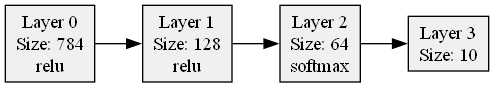

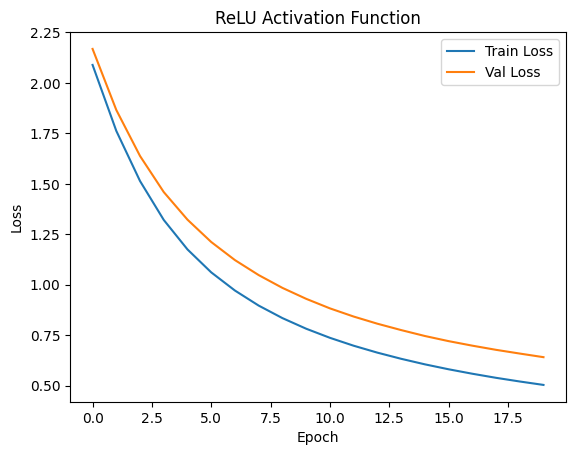

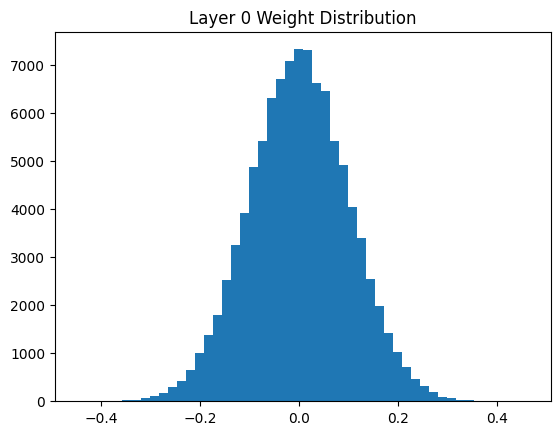

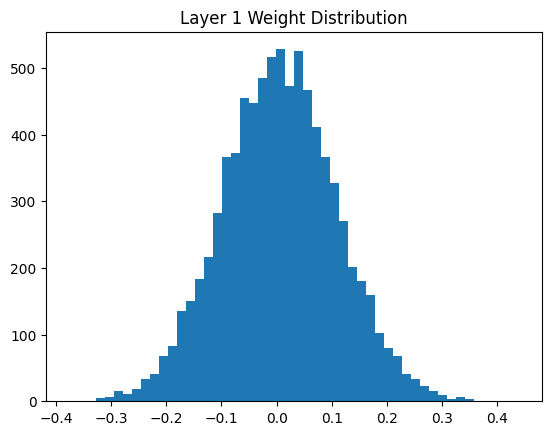

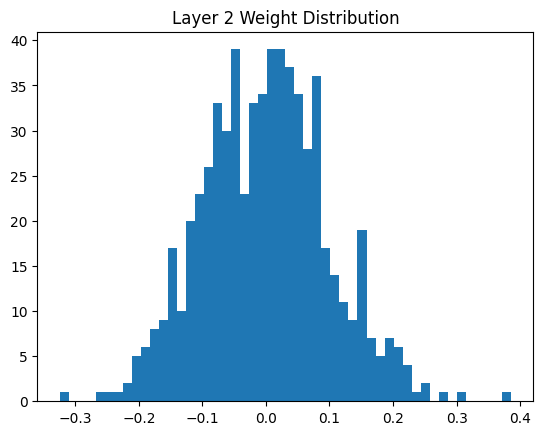

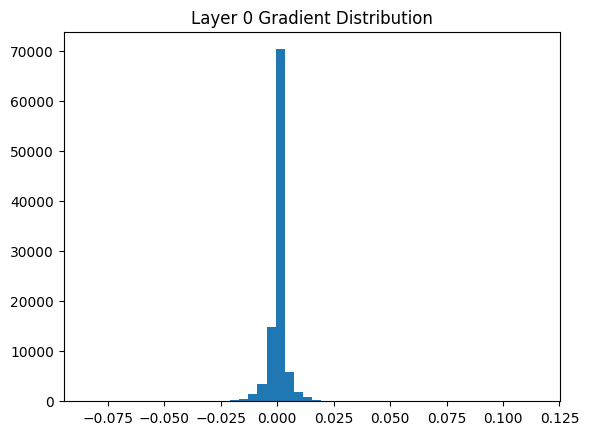

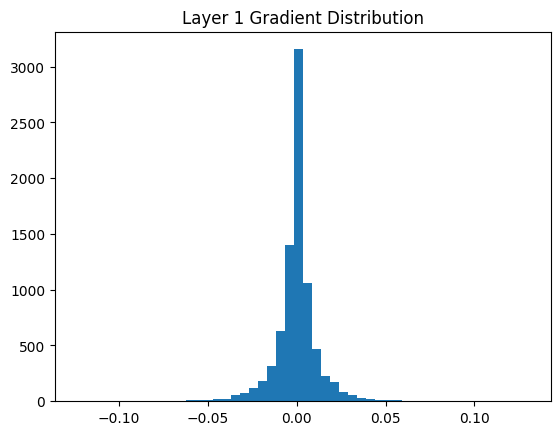

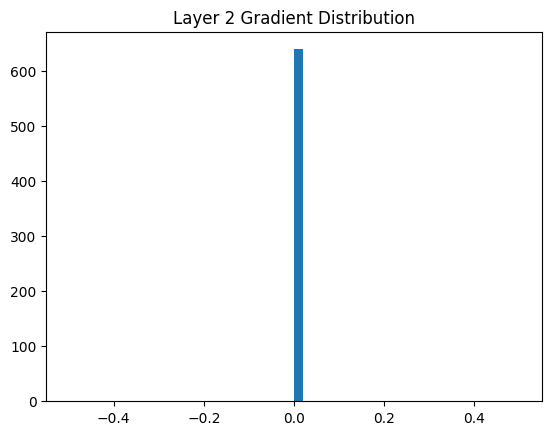

Epoch 1/20 - Train Loss: 2.3240 - Val Loss: 2.3423
Epoch 2/20 - Train Loss: 2.3157 - Val Loss: 2.3338
Epoch 3/20 - Train Loss: 2.3076 - Val Loss: 2.3256
Epoch 4/20 - Train Loss: 2.2999 - Val Loss: 2.3178
Epoch 5/20 - Train Loss: 2.2923 - Val Loss: 2.3102
Epoch 6/20 - Train Loss: 2.2851 - Val Loss: 2.3030
Epoch 7/20 - Train Loss: 2.2779 - Val Loss: 2.2959
Epoch 8/20 - Train Loss: 2.2711 - Val Loss: 2.2891
Epoch 9/20 - Train Loss: 2.2644 - Val Loss: 2.2825
Epoch 10/20 - Train Loss: 2.2579 - Val Loss: 2.2762
Epoch 11/20 - Train Loss: 2.2515 - Val Loss: 2.2700
Epoch 12/20 - Train Loss: 2.2453 - Val Loss: 2.2639
Epoch 13/20 - Train Loss: 2.2392 - Val Loss: 2.2580
Epoch 14/20 - Train Loss: 2.2331 - Val Loss: 2.2522
Epoch 15/20 - Train Loss: 2.2272 - Val Loss: 2.2464
Epoch 16/20 - Train Loss: 2.2214 - Val Loss: 2.2409
Epoch 17/20 - Train Loss: 2.2156 - Val Loss: 2.2354
Epoch 18/20 - Train Loss: 2.2099 - Val Loss: 2.2300
Epoch 19/20 - Train Loss: 2.2042 - Val Loss: 2.2246
Epoch 20/20 - Train L

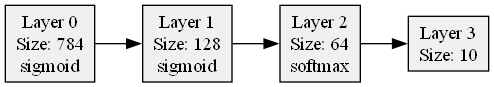

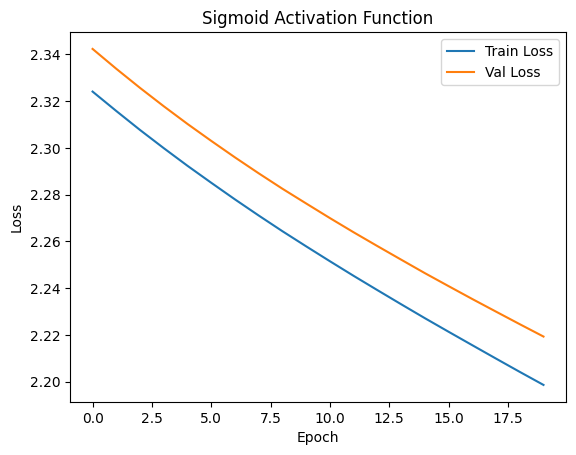

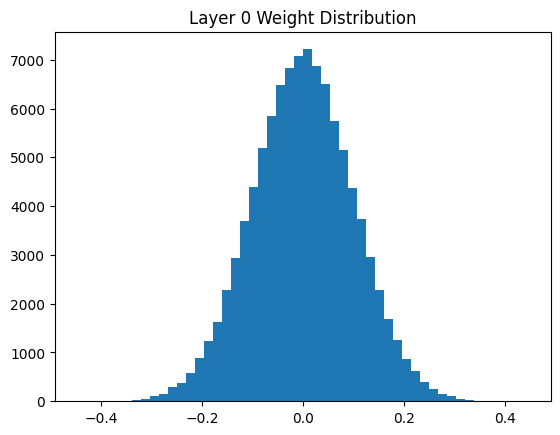

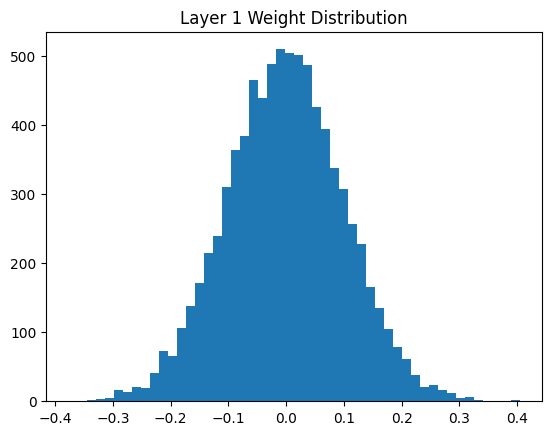

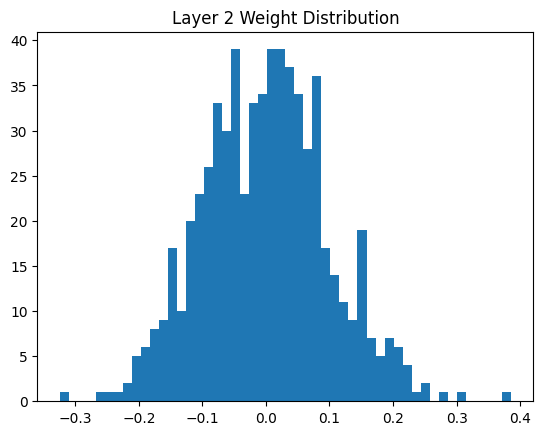

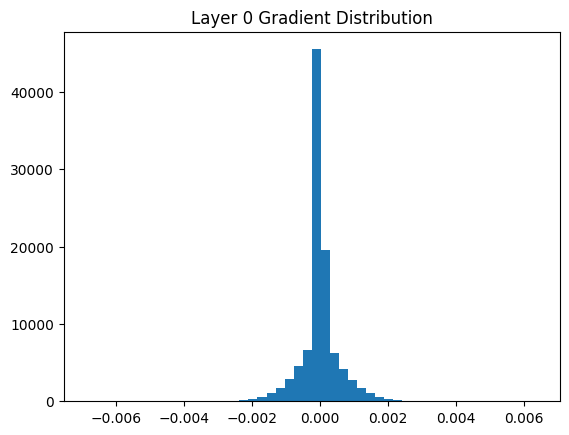

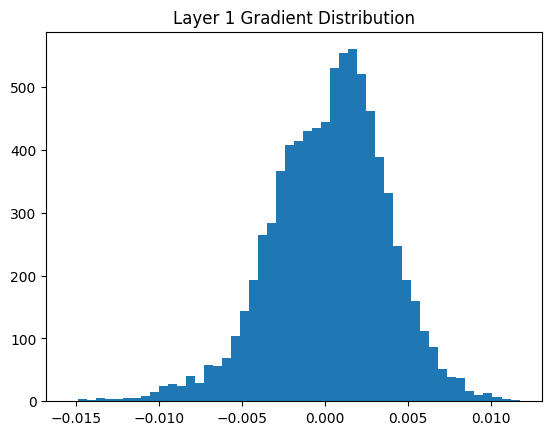

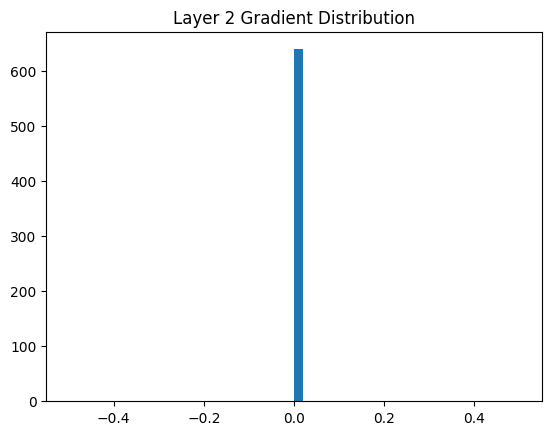

d:\KULIAH\SEM 6\ML\whitebox\src\Layer.py:70: RuntimeWarning: overflow encountered in exp
  self.A = 1 / (1 + np.exp(-self.Z))


Epoch 1/20 - Train Loss: 2.6113 - Val Loss: 2.8625
Epoch 2/20 - Train Loss: 2.0819 - Val Loss: 2.3478
Epoch 3/20 - Train Loss: 1.7731 - Val Loss: 2.0333
Epoch 4/20 - Train Loss: 1.5647 - Val Loss: 1.8136
Epoch 5/20 - Train Loss: 1.4153 - Val Loss: 1.6517
Epoch 6/20 - Train Loss: 1.3025 - Val Loss: 1.5258
Epoch 7/20 - Train Loss: 1.2154 - Val Loss: 1.4267
Epoch 8/20 - Train Loss: 1.1451 - Val Loss: 1.3469
Epoch 9/20 - Train Loss: 1.0868 - Val Loss: 1.2801
Epoch 10/20 - Train Loss: 1.0374 - Val Loss: 1.2225
Epoch 11/20 - Train Loss: 0.9957 - Val Loss: 1.1739
Epoch 12/20 - Train Loss: 0.9598 - Val Loss: 1.1322
Epoch 13/20 - Train Loss: 0.9279 - Val Loss: 1.0948
Epoch 14/20 - Train Loss: 0.9001 - Val Loss: 1.0620
Epoch 15/20 - Train Loss: 0.8750 - Val Loss: 1.0326
Epoch 16/20 - Train Loss: 0.8525 - Val Loss: 1.0063
Epoch 17/20 - Train Loss: 0.8318 - Val Loss: 0.9814
Epoch 18/20 - Train Loss: 0.8130 - Val Loss: 0.9593
Epoch 19/20 - Train Loss: 0.7960 - Val Loss: 0.9391
Epoch 20/20 - Train L

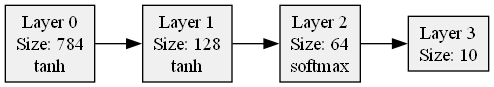

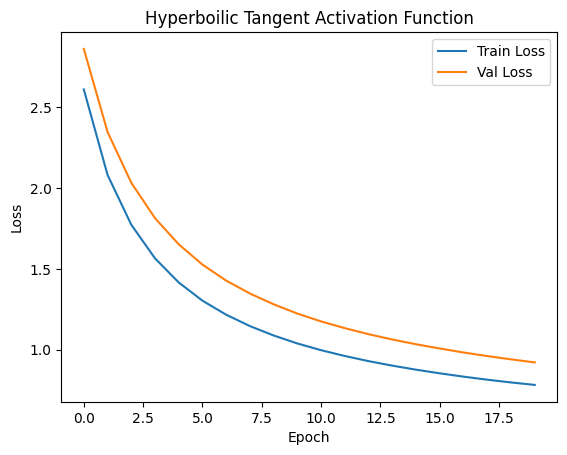

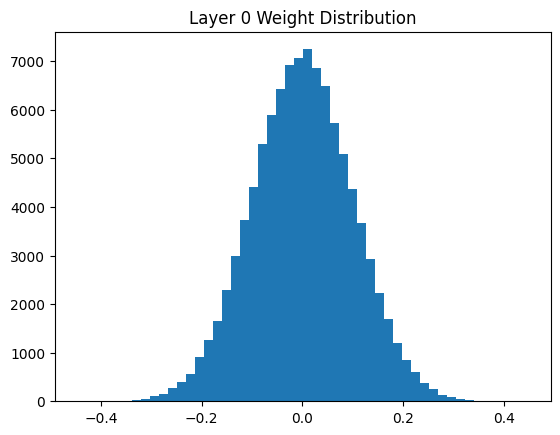

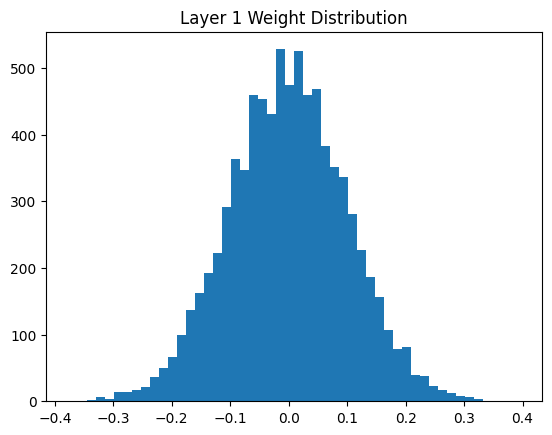

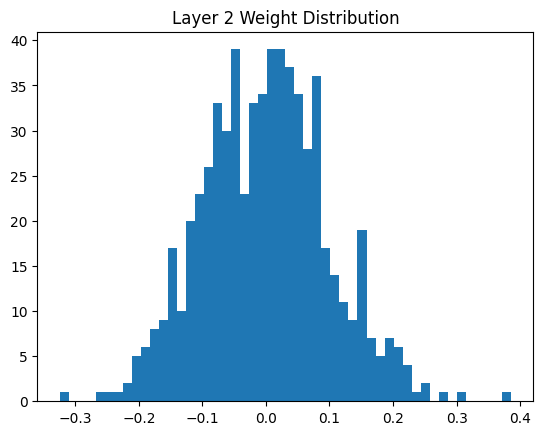

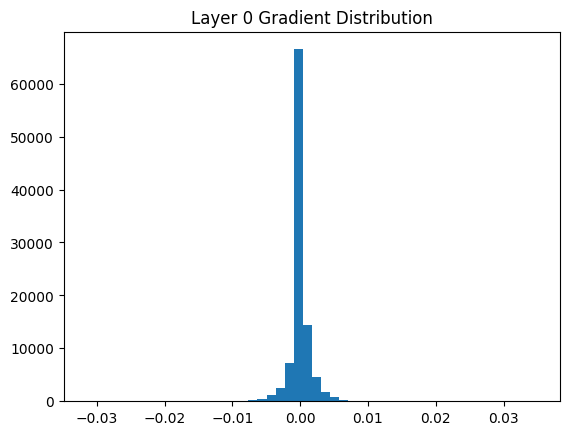

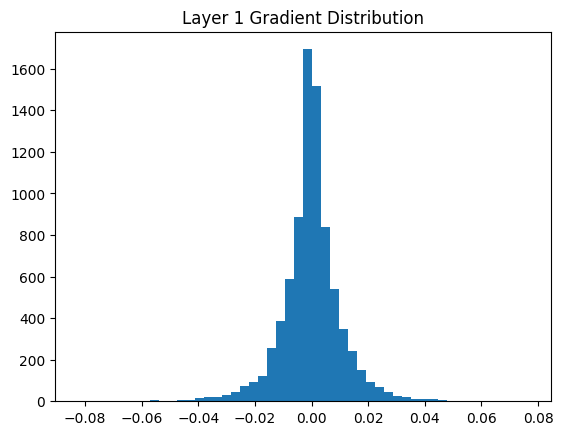

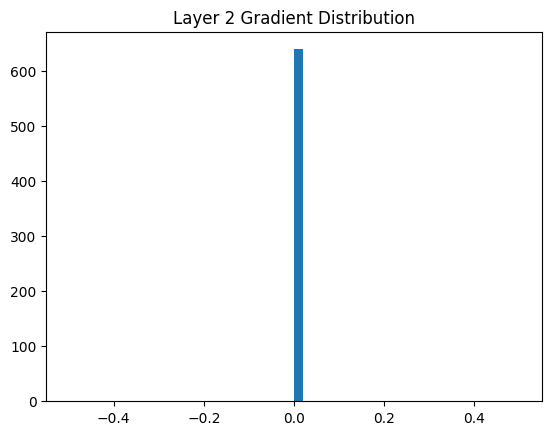

Epoch 1/20 - Train Loss: 1.3667 - Val Loss: 1.6240
Epoch 2/20 - Train Loss: 0.9626 - Val Loss: 1.1737
Epoch 3/20 - Train Loss: 0.7897 - Val Loss: 0.9786
Epoch 4/20 - Train Loss: 0.6896 - Val Loss: 0.8589
Epoch 5/20 - Train Loss: 0.6237 - Val Loss: 0.7817
Epoch 6/20 - Train Loss: 0.5742 - Val Loss: 0.7285
Epoch 7/20 - Train Loss: 0.5364 - Val Loss: 0.6848
Epoch 8/20 - Train Loss: 0.5052 - Val Loss: 0.6516
Epoch 9/20 - Train Loss: 0.4800 - Val Loss: 0.6246
Epoch 10/20 - Train Loss: 0.4588 - Val Loss: 0.6032
Epoch 11/20 - Train Loss: 0.4408 - Val Loss: 0.5869
Epoch 12/20 - Train Loss: 0.4253 - Val Loss: 0.5754
Epoch 13/20 - Train Loss: 0.4118 - Val Loss: 0.5612
Epoch 14/20 - Train Loss: 0.4002 - Val Loss: 0.5524
Epoch 15/20 - Train Loss: 0.3896 - Val Loss: 0.5415
Epoch 16/20 - Train Loss: 0.3801 - Val Loss: 0.5316
Epoch 17/20 - Train Loss: 0.3716 - Val Loss: 0.5265
Epoch 18/20 - Train Loss: 0.3637 - Val Loss: 0.5187
Epoch 19/20 - Train Loss: 0.3566 - Val Loss: 0.5125
Epoch 20/20 - Train L

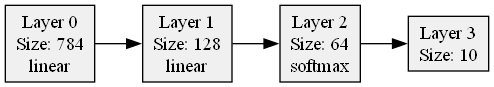

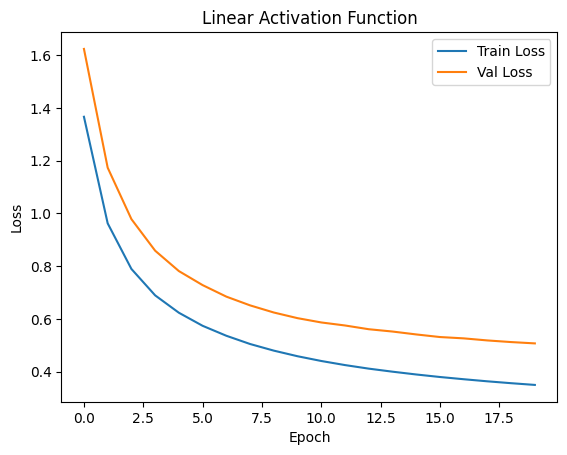

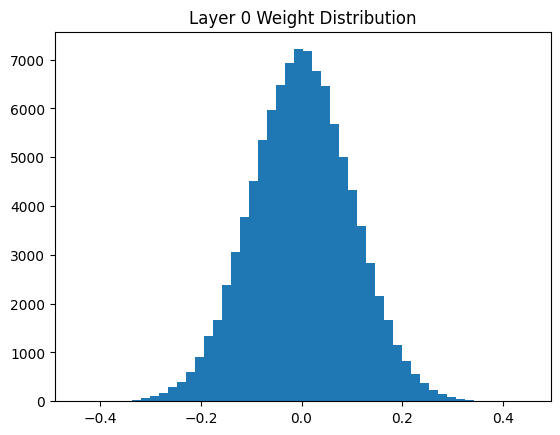

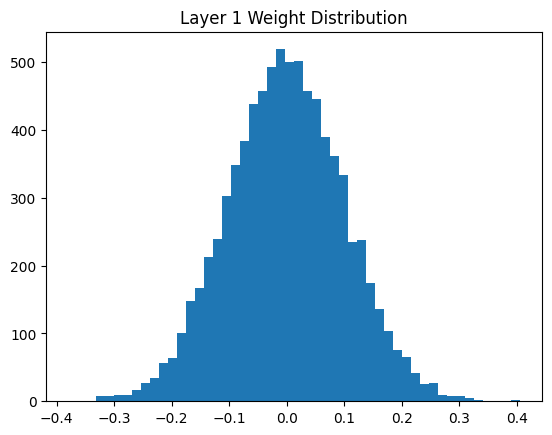

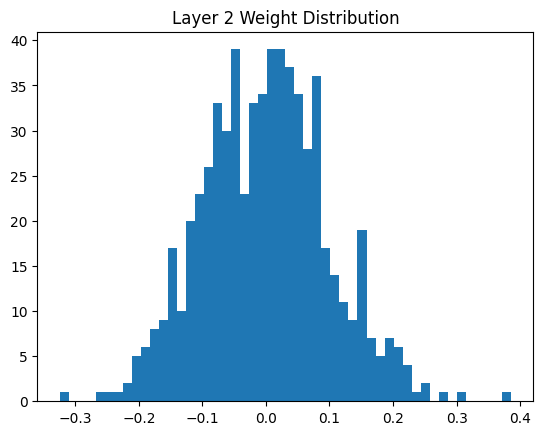

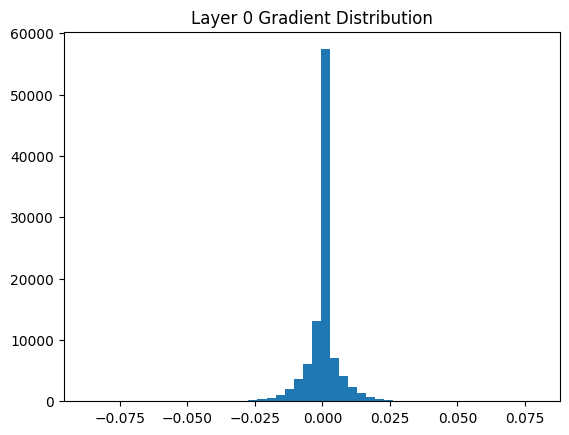

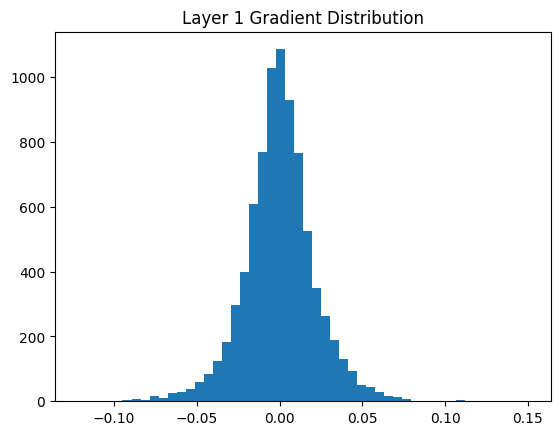

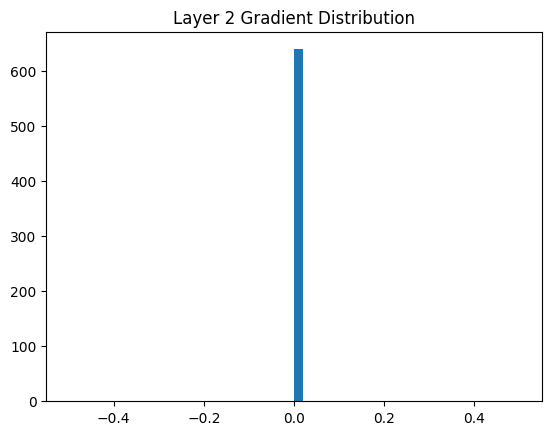

In [9]:
## Variasi activation FFNN

# 1. ReLU
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('ReLU Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0


# 2. Sigmoid
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['sigmoid', 'sigmoid', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Sigmoid Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0


# 3. Tanh
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['tanh', 'tanh', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Hyperboilic Tangent Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0


# 4. Linear
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['linear', 'linear', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()


plt.title('Linear Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0

## Learning Rate Variation

Epoch 1/20 - Train Loss: 2.5794 - Val Loss: 2.6237
Epoch 2/20 - Train Loss: 2.5039 - Val Loss: 2.5538
Epoch 3/20 - Train Loss: 2.4366 - Val Loss: 2.4912
Epoch 4/20 - Train Loss: 2.3749 - Val Loss: 2.4336
Epoch 5/20 - Train Loss: 2.3188 - Val Loss: 2.3809
Epoch 6/20 - Train Loss: 2.2668 - Val Loss: 2.3324
Epoch 7/20 - Train Loss: 2.2181 - Val Loss: 2.2874
Epoch 8/20 - Train Loss: 2.1725 - Val Loss: 2.2455
Epoch 9/20 - Train Loss: 2.1296 - Val Loss: 2.2060
Epoch 10/20 - Train Loss: 2.0890 - Val Loss: 2.1688
Epoch 11/20 - Train Loss: 2.0506 - Val Loss: 2.1334
Epoch 12/20 - Train Loss: 2.0139 - Val Loss: 2.0997
Epoch 13/20 - Train Loss: 1.9788 - Val Loss: 2.0673
Epoch 14/20 - Train Loss: 1.9449 - Val Loss: 2.0360
Epoch 15/20 - Train Loss: 1.9121 - Val Loss: 2.0056
Epoch 16/20 - Train Loss: 1.8804 - Val Loss: 1.9764
Epoch 17/20 - Train Loss: 1.8497 - Val Loss: 1.9480
Epoch 18/20 - Train Loss: 1.8197 - Val Loss: 1.9204
Epoch 19/20 - Train Loss: 1.7905 - Val Loss: 1.8936
Epoch 20/20 - Train L

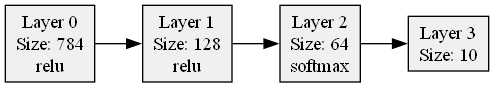

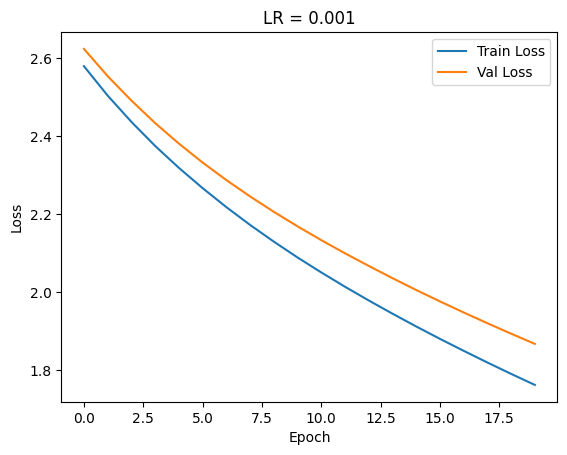

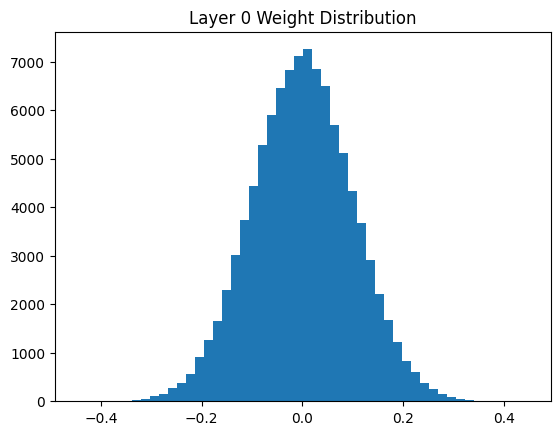

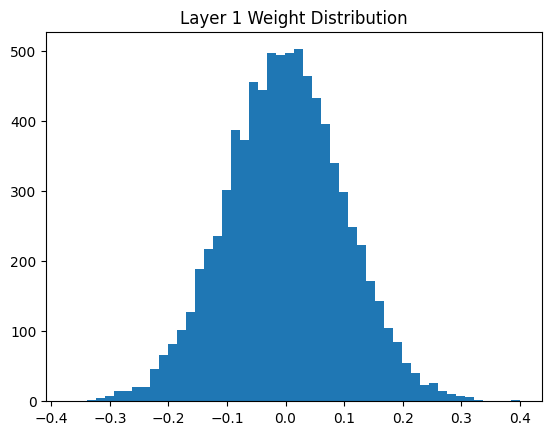

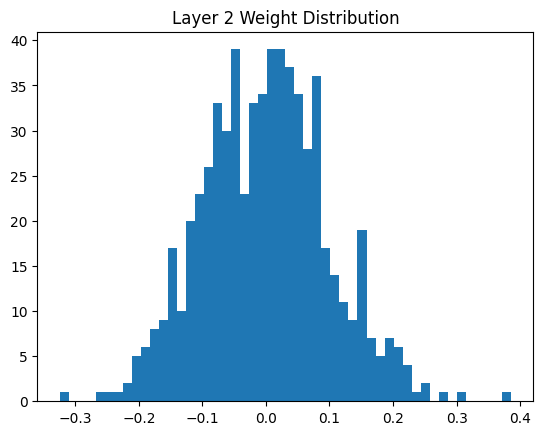

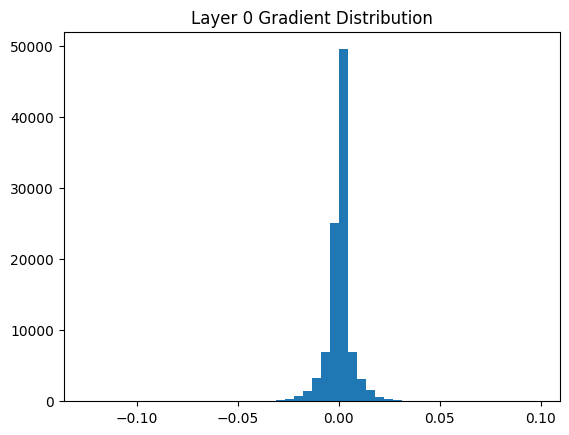

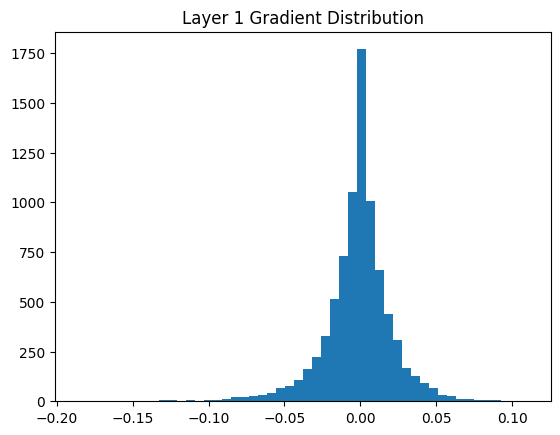

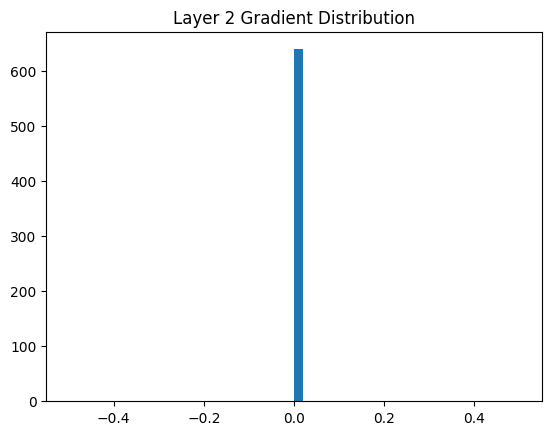

Epoch 1/20 - Train Loss: 2.0889 - Val Loss: 2.1682
Epoch 2/20 - Train Loss: 1.7621 - Val Loss: 1.8657
Epoch 3/20 - Train Loss: 1.5136 - Val Loss: 1.6377
Epoch 4/20 - Train Loss: 1.3209 - Val Loss: 1.4591
Epoch 5/20 - Train Loss: 1.1748 - Val Loss: 1.3223
Epoch 6/20 - Train Loss: 1.0613 - Val Loss: 1.2117
Epoch 7/20 - Train Loss: 0.9712 - Val Loss: 1.1220
Epoch 8/20 - Train Loss: 0.8967 - Val Loss: 1.0478
Epoch 9/20 - Train Loss: 0.8348 - Val Loss: 0.9845
Epoch 10/20 - Train Loss: 0.7822 - Val Loss: 0.9303
Epoch 11/20 - Train Loss: 0.7372 - Val Loss: 0.8830
Epoch 12/20 - Train Loss: 0.6980 - Val Loss: 0.8425
Epoch 13/20 - Train Loss: 0.6637 - Val Loss: 0.8070
Epoch 14/20 - Train Loss: 0.6333 - Val Loss: 0.7755
Epoch 15/20 - Train Loss: 0.6058 - Val Loss: 0.7462
Epoch 16/20 - Train Loss: 0.5813 - Val Loss: 0.7207
Epoch 17/20 - Train Loss: 0.5592 - Val Loss: 0.6983
Epoch 18/20 - Train Loss: 0.5390 - Val Loss: 0.6776
Epoch 19/20 - Train Loss: 0.5208 - Val Loss: 0.6591
Epoch 20/20 - Train L

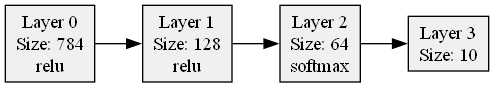

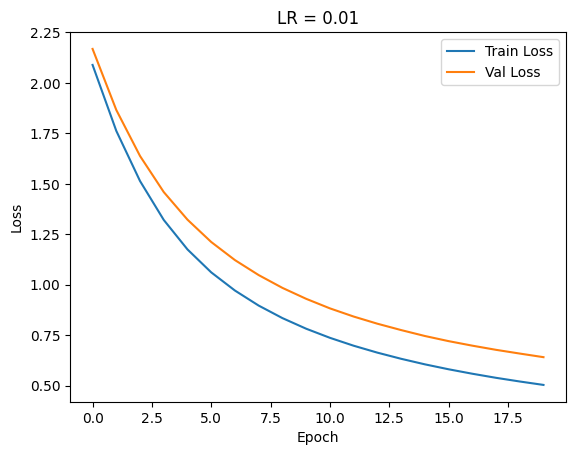

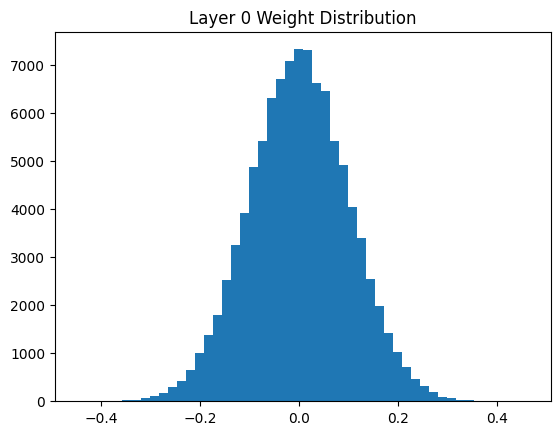

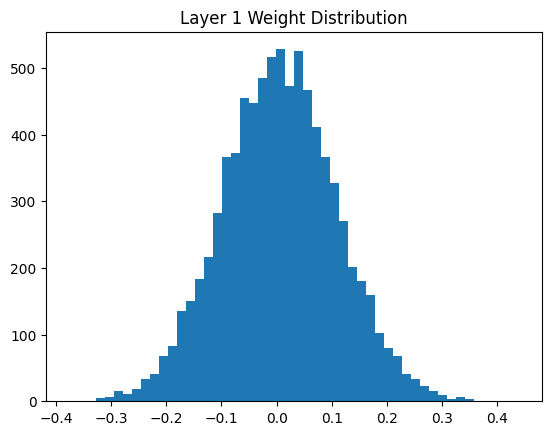

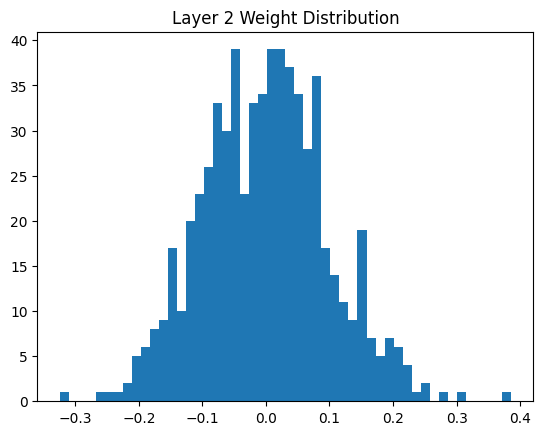

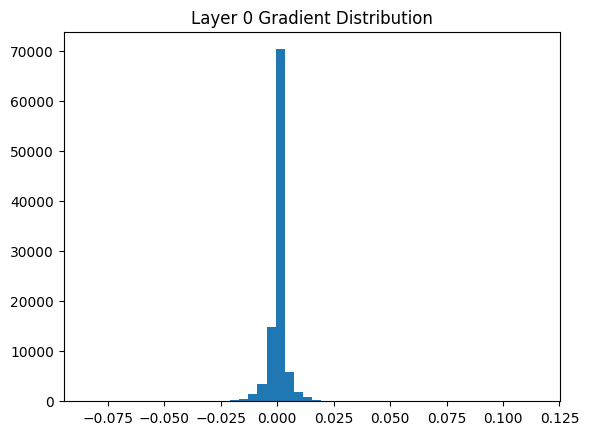

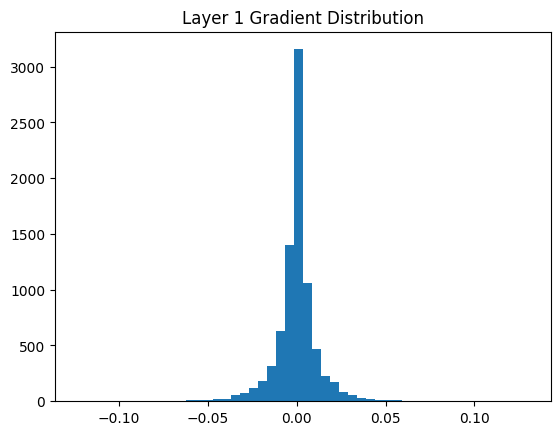

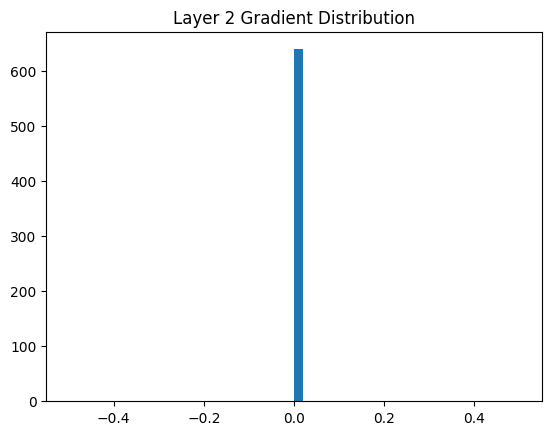

Epoch 1/20 - Train Loss: 0.7925 - Val Loss: 0.9329
Epoch 2/20 - Train Loss: 0.5073 - Val Loss: 0.6386
Epoch 3/20 - Train Loss: 0.3993 - Val Loss: 0.5417
Epoch 4/20 - Train Loss: 0.3303 - Val Loss: 0.4841
Epoch 5/20 - Train Loss: 0.2833 - Val Loss: 0.4475
Epoch 6/20 - Train Loss: 0.2445 - Val Loss: 0.4190
Epoch 7/20 - Train Loss: 0.2299 - Val Loss: 0.4006
Epoch 8/20 - Train Loss: 0.1956 - Val Loss: 0.3849
Epoch 9/20 - Train Loss: 0.1786 - Val Loss: 0.3721
Epoch 10/20 - Train Loss: 0.1618 - Val Loss: 0.3671
Epoch 11/20 - Train Loss: 0.1503 - Val Loss: 0.3687
Epoch 12/20 - Train Loss: 0.1381 - Val Loss: 0.3671
Epoch 13/20 - Train Loss: 0.1269 - Val Loss: 0.3581
Epoch 14/20 - Train Loss: 0.1194 - Val Loss: 0.3632
Epoch 15/20 - Train Loss: 0.1097 - Val Loss: 0.3516
Epoch 16/20 - Train Loss: 0.1026 - Val Loss: 0.3505
Epoch 17/20 - Train Loss: 0.0960 - Val Loss: 0.3512
Epoch 18/20 - Train Loss: 0.0900 - Val Loss: 0.3488
Epoch 19/20 - Train Loss: 0.0848 - Val Loss: 0.3505
Epoch 20/20 - Train L

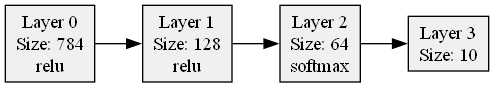

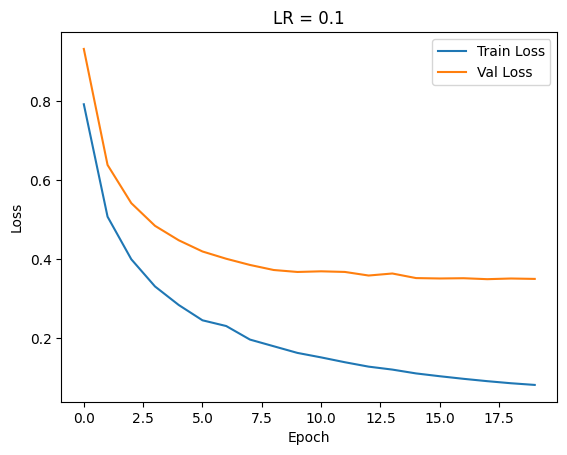

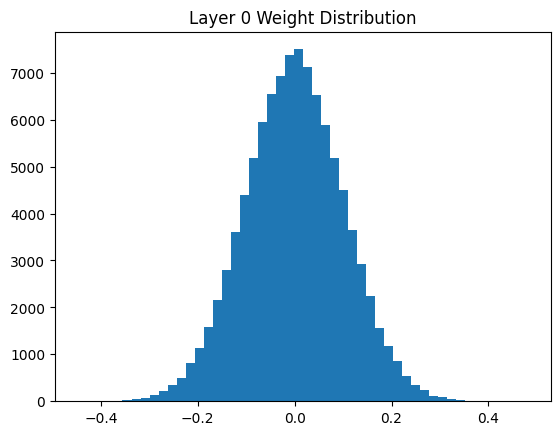

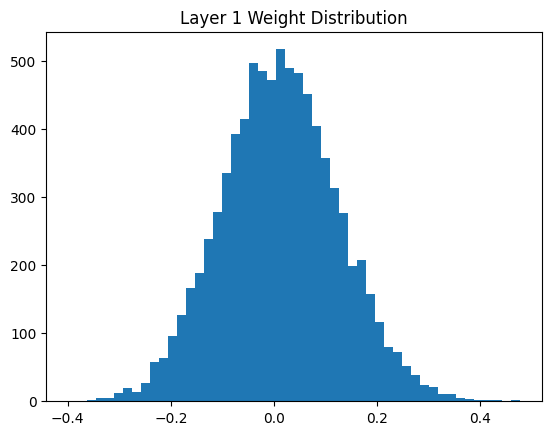

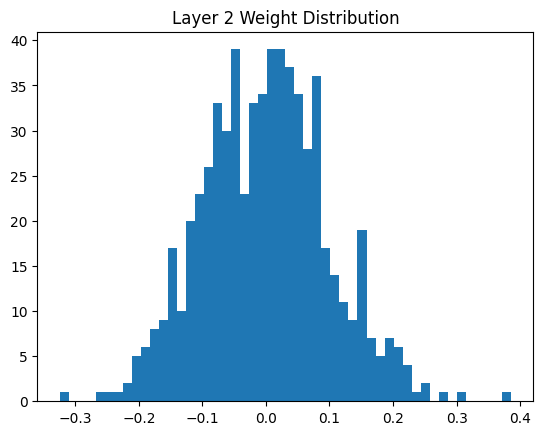

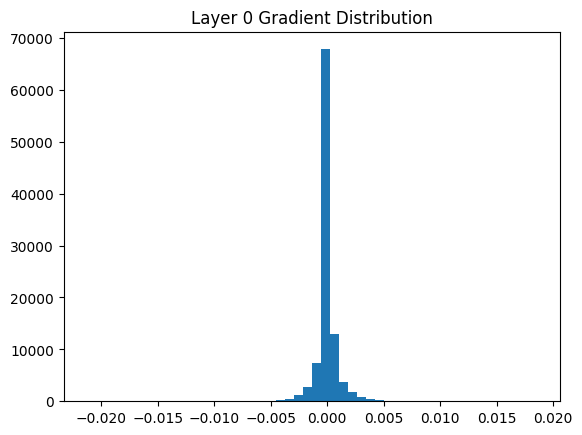

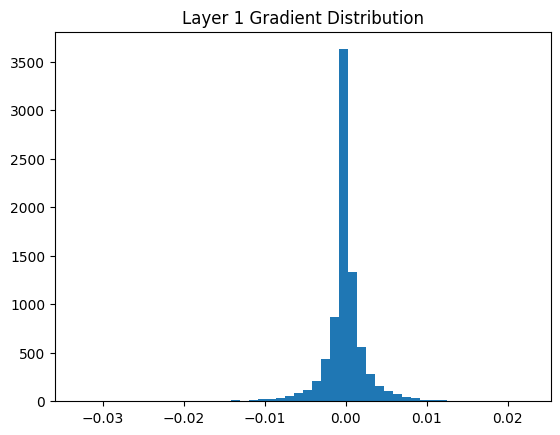

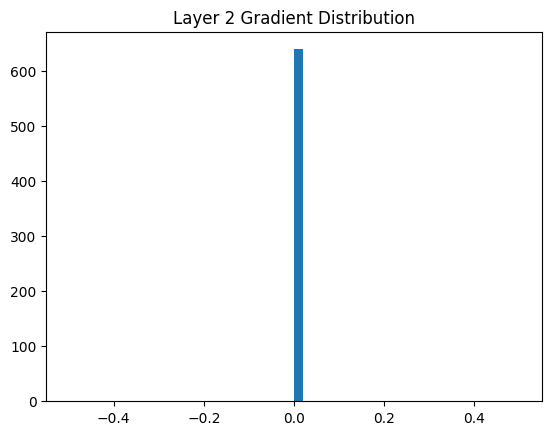

In [10]:
## Variasi activation FFNN

# 1. Learning Rate = 0.001
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.001,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('LR = 0.001')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0


# 2. Learning Rate = 0.01
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('LR = 0.01')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0


# 3. Learning Rate = 0.1
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.1,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('LR = 0.1')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0

## Weight Initialization Variation

Epoch 1/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 2/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 3/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 4/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 5/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 6/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 7/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 8/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 9/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 10/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 11/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 12/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 13/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 14/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 15/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 16/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 17/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 18/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 19/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 20/20 - Train L

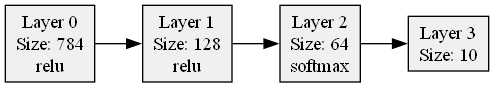

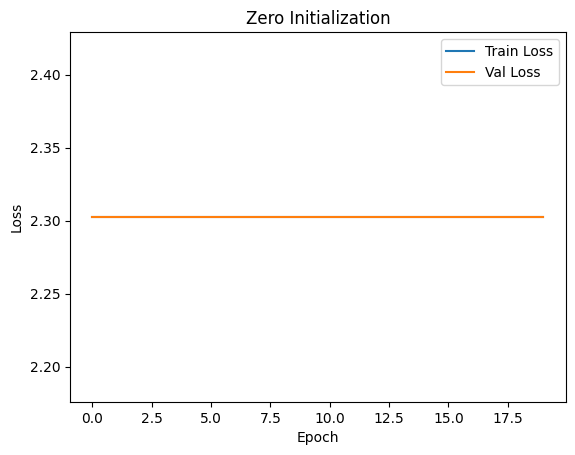

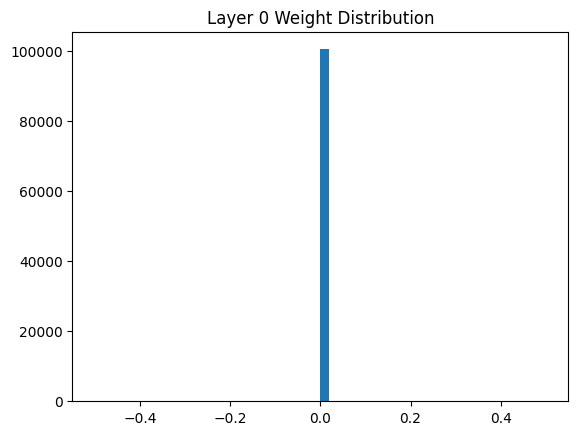

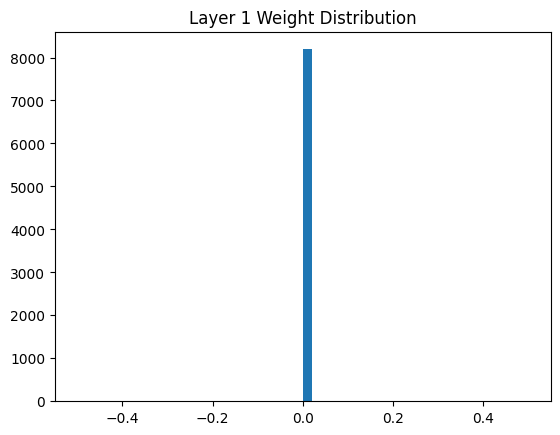

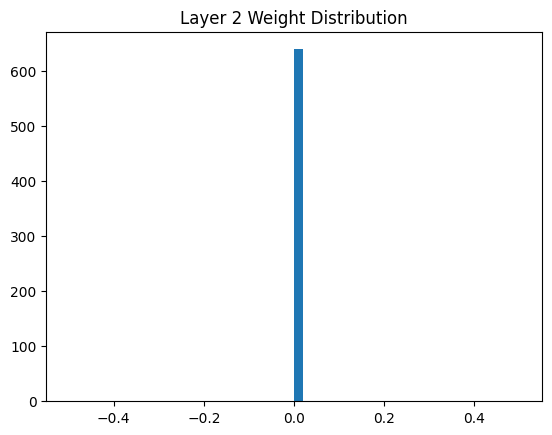

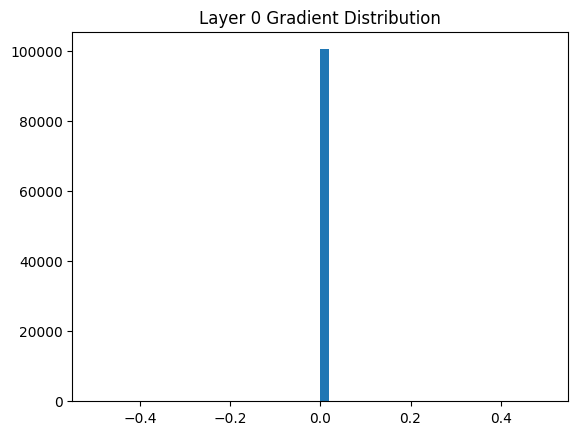

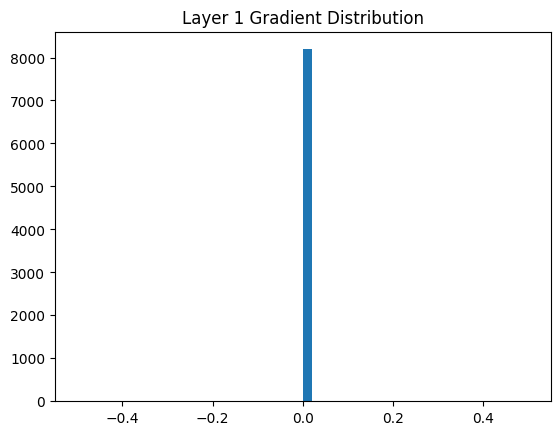

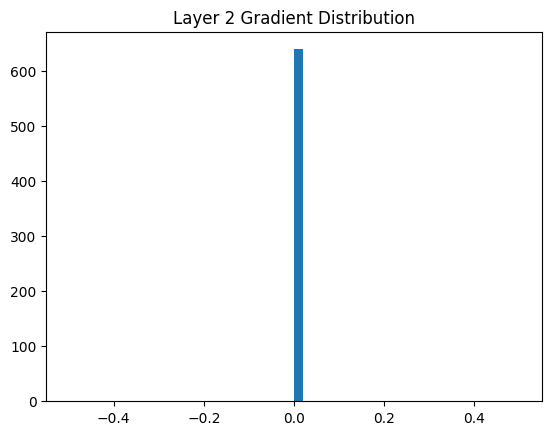

Epoch 1/20 - Train Loss: 11.5046 - Val Loss: 12.9237
Epoch 2/20 - Train Loss: 7.8453 - Val Loss: 9.5792
Epoch 3/20 - Train Loss: 5.9272 - Val Loss: 8.8803
Epoch 4/20 - Train Loss: 4.6554 - Val Loss: 8.2257
Epoch 5/20 - Train Loss: 4.0316 - Val Loss: 7.6172
Epoch 6/20 - Train Loss: 3.2802 - Val Loss: 7.2602
Epoch 7/20 - Train Loss: 2.9952 - Val Loss: 7.2047
Epoch 8/20 - Train Loss: 2.4645 - Val Loss: 6.9347
Epoch 9/20 - Train Loss: 2.1699 - Val Loss: 6.9206
Epoch 10/20 - Train Loss: 2.1617 - Val Loss: 7.2387
Epoch 11/20 - Train Loss: 1.5464 - Val Loss: 6.6050
Epoch 12/20 - Train Loss: 1.3488 - Val Loss: 6.6230
Epoch 13/20 - Train Loss: 1.2710 - Val Loss: 6.6442
Epoch 14/20 - Train Loss: 1.0898 - Val Loss: 6.5946
Epoch 15/20 - Train Loss: 0.9844 - Val Loss: 6.6225
Epoch 16/20 - Train Loss: 0.8717 - Val Loss: 6.5009
Epoch 17/20 - Train Loss: 0.7369 - Val Loss: 6.5282
Epoch 18/20 - Train Loss: 0.6631 - Val Loss: 6.5526
Epoch 19/20 - Train Loss: 0.8150 - Val Loss: 6.4484
Epoch 20/20 - Train

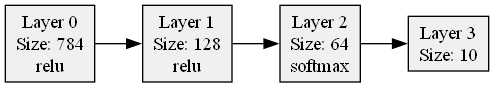

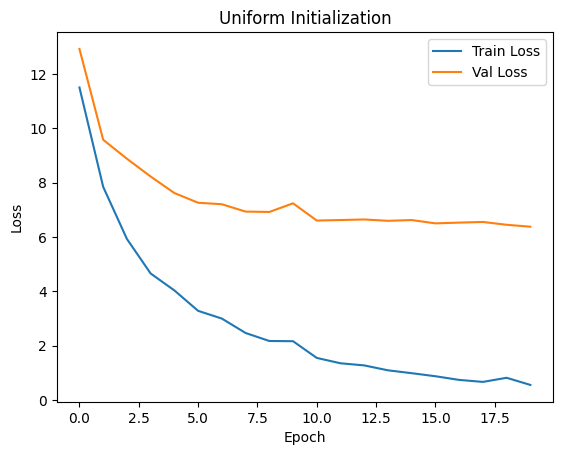

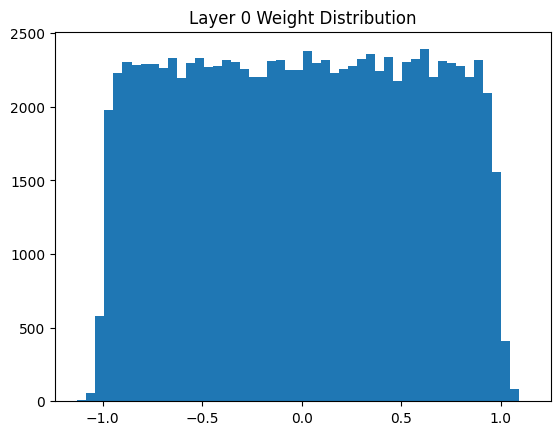

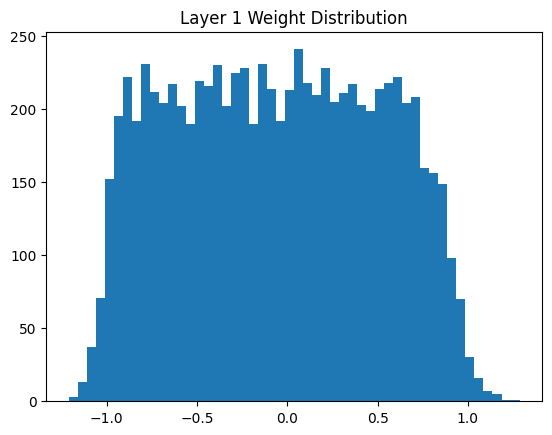

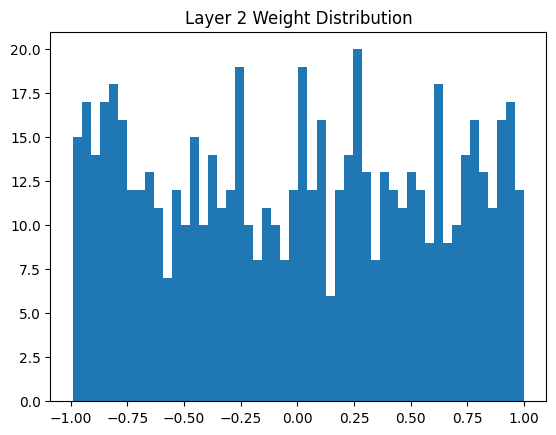

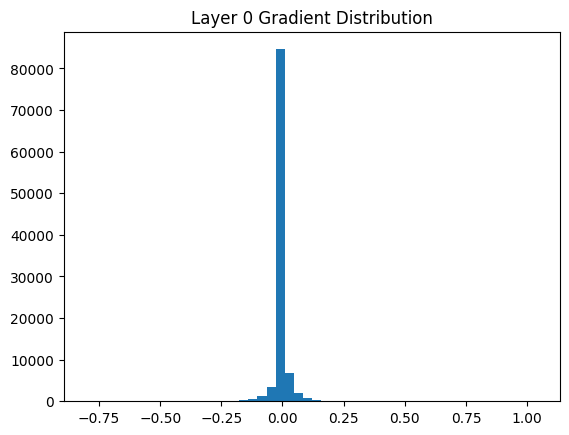

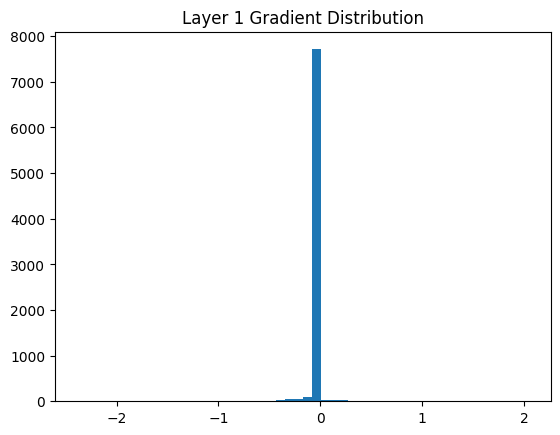

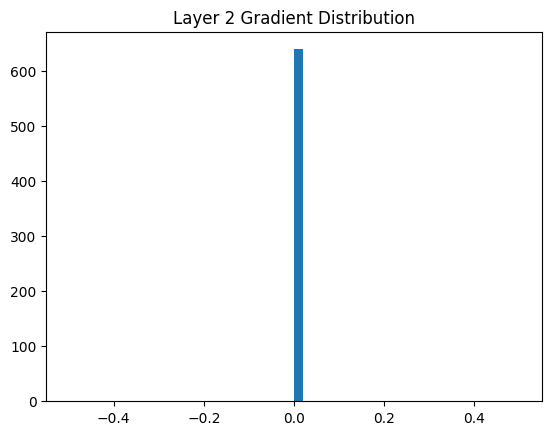

Epoch 1/20 - Train Loss: 2.0889 - Val Loss: 2.1682
Epoch 2/20 - Train Loss: 1.7621 - Val Loss: 1.8657
Epoch 3/20 - Train Loss: 1.5136 - Val Loss: 1.6377
Epoch 4/20 - Train Loss: 1.3209 - Val Loss: 1.4591
Epoch 5/20 - Train Loss: 1.1748 - Val Loss: 1.3223
Epoch 6/20 - Train Loss: 1.0613 - Val Loss: 1.2117
Epoch 7/20 - Train Loss: 0.9712 - Val Loss: 1.1220
Epoch 8/20 - Train Loss: 0.8967 - Val Loss: 1.0478
Epoch 9/20 - Train Loss: 0.8348 - Val Loss: 0.9845
Epoch 10/20 - Train Loss: 0.7822 - Val Loss: 0.9303
Epoch 11/20 - Train Loss: 0.7372 - Val Loss: 0.8830
Epoch 12/20 - Train Loss: 0.6980 - Val Loss: 0.8425
Epoch 13/20 - Train Loss: 0.6637 - Val Loss: 0.8070
Epoch 14/20 - Train Loss: 0.6333 - Val Loss: 0.7755
Epoch 15/20 - Train Loss: 0.6058 - Val Loss: 0.7462
Epoch 16/20 - Train Loss: 0.5813 - Val Loss: 0.7207
Epoch 17/20 - Train Loss: 0.5592 - Val Loss: 0.6983
Epoch 18/20 - Train Loss: 0.5390 - Val Loss: 0.6776
Epoch 19/20 - Train Loss: 0.5208 - Val Loss: 0.6591
Epoch 20/20 - Train L

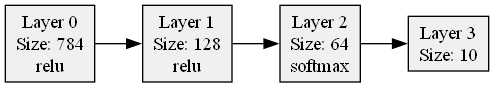

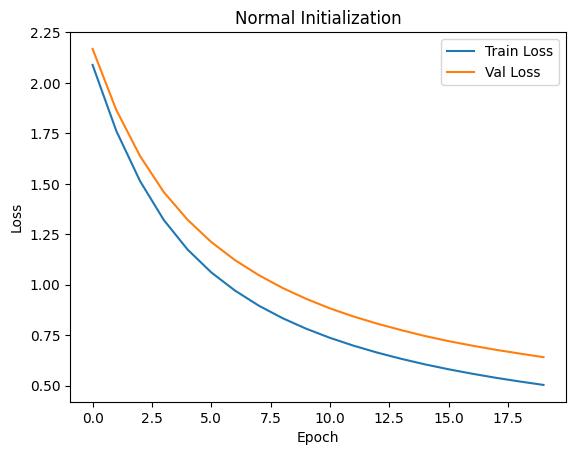

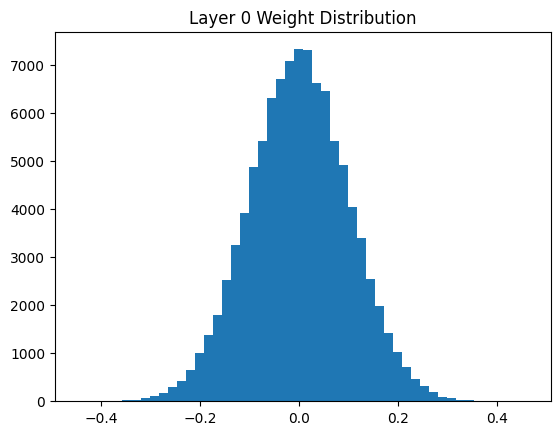

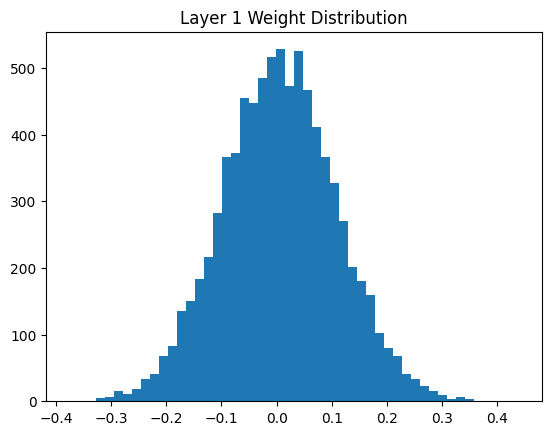

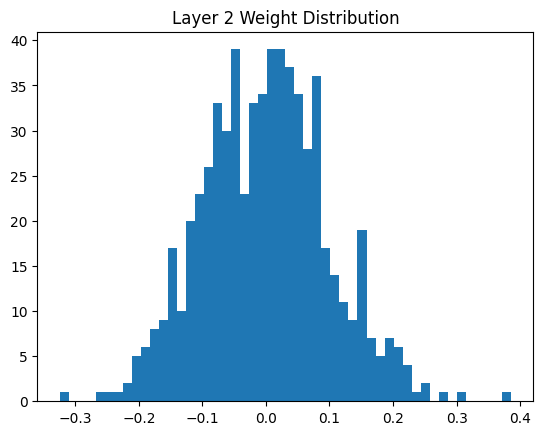

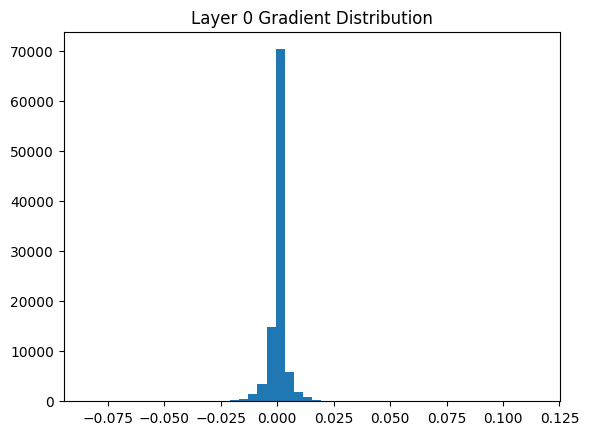

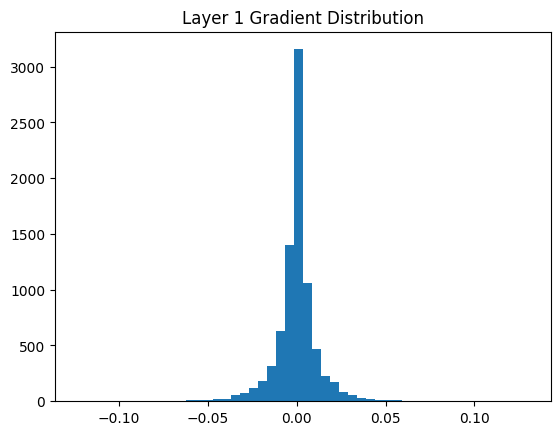

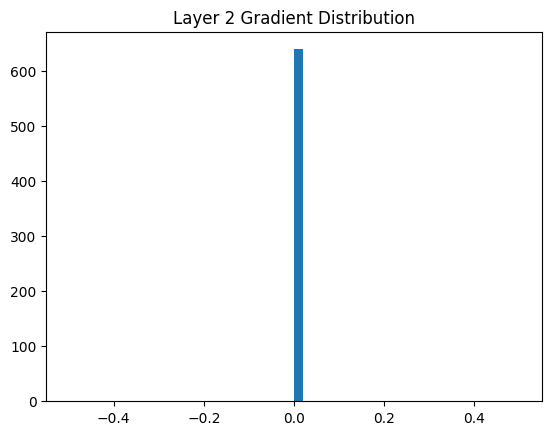

In [11]:
## Variasi weight initialization
# 1. Zero initialization
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu','softmax']
weight_inits = [
    {'method': 'zero'},
    {'method': 'zero'},
    {'method': 'zero'}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Zero Initialization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0

# 2. Uniform
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu','softmax']
weight_inits = [
    {'method': 'uniform', 'lower': -1, 'upper': 1, 'seed': 42},
    {'method': 'uniform', 'lower': -1, 'upper': 1, 'seed': 42},
    {'method': 'uniform', 'lower': -1, 'upper': 1, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Uniform Initialization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0

# 3. Normal
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Normal Initialization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0

## Compare with sklearn

Epoch 1/20 - Train Loss: 2.0889 - Val Loss: 2.1682
Epoch 2/20 - Train Loss: 1.7621 - Val Loss: 1.8657
Epoch 3/20 - Train Loss: 1.5136 - Val Loss: 1.6377
Epoch 4/20 - Train Loss: 1.3209 - Val Loss: 1.4591
Epoch 5/20 - Train Loss: 1.1748 - Val Loss: 1.3223
Epoch 6/20 - Train Loss: 1.0613 - Val Loss: 1.2117
Epoch 7/20 - Train Loss: 0.9712 - Val Loss: 1.1220
Epoch 8/20 - Train Loss: 0.8967 - Val Loss: 1.0478
Epoch 9/20 - Train Loss: 0.8348 - Val Loss: 0.9845
Epoch 10/20 - Train Loss: 0.7822 - Val Loss: 0.9303
Epoch 11/20 - Train Loss: 0.7372 - Val Loss: 0.8830
Epoch 12/20 - Train Loss: 0.6980 - Val Loss: 0.8425
Epoch 13/20 - Train Loss: 0.6637 - Val Loss: 0.8070
Epoch 14/20 - Train Loss: 0.6333 - Val Loss: 0.7755
Epoch 15/20 - Train Loss: 0.6058 - Val Loss: 0.7462
Epoch 16/20 - Train Loss: 0.5813 - Val Loss: 0.7207
Epoch 17/20 - Train Loss: 0.5592 - Val Loss: 0.6983
Epoch 18/20 - Train Loss: 0.5390 - Val Loss: 0.6776
Epoch 19/20 - Train Loss: 0.5208 - Val Loss: 0.6591
Epoch 20/20 - Train L

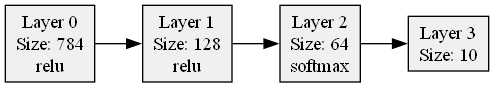

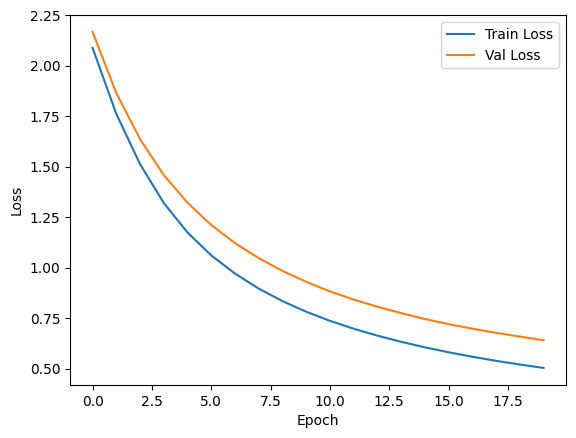

Iteration 1, loss = 1.07063014
Iteration 2, loss = 0.32679889
Iteration 3, loss = 0.19736780
Iteration 4, loss = 0.13231365
Iteration 5, loss = 0.09165937
Iteration 6, loss = 0.06637531
Iteration 7, loss = 0.04756873
Iteration 8, loss = 0.03415395
Iteration 9, loss = 0.02610289
Iteration 10, loss = 0.01885156
Iteration 11, loss = 0.01454743
Iteration 12, loss = 0.01161546
Iteration 13, loss = 0.00954892
Iteration 14, loss = 0.00765875
Iteration 15, loss = 0.00697851
Iteration 16, loss = 0.00543298
Iteration 17, loss = 0.00466884
Iteration 18, loss = 0.00409415
Iteration 19, loss = 0.00364083
Iteration 20, loss = 0.00323478


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


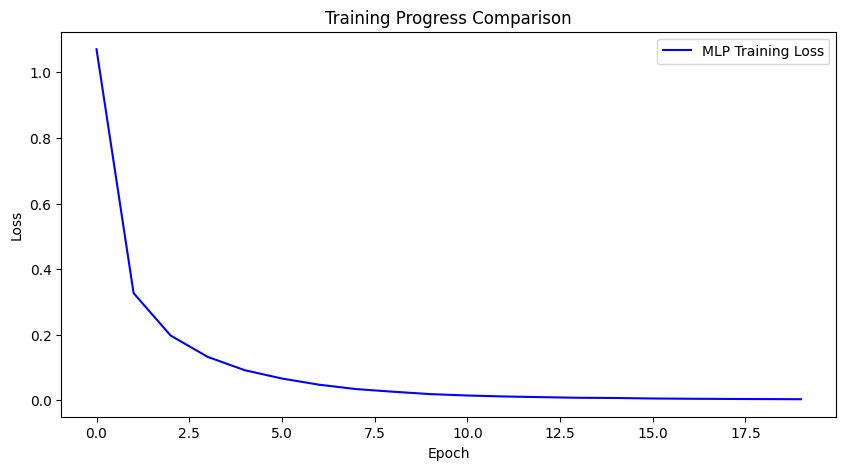

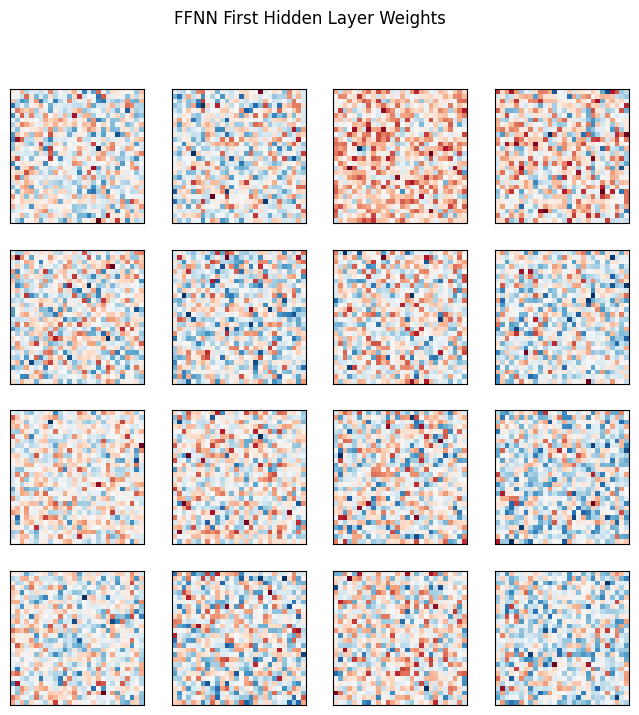


================= Hasil Perbandingan =================
FFNN Test Accuracy: 0.00% | Waktu: 3.84s
MLP Test Accuracy: 93.09% | Waktu: 3.05s


In [12]:

# 3. Implementasi FFNN Kustom
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0

# 4. Implementasi MLPClassifier
# ==============================
t0 = time.time()
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=128,
    max_iter=20,
    verbose=True,
    random_state=42
)

mlp_clf.fit(X_train, y_train)
mlp_accuracy = mlp_clf.score(X_test, y_test)
mlp_time = time.time() - t0

# 5. Plotting dan Hasil
# ==============================
# Plot akurasi
plt.figure(figsize=(10, 5))
if hasattr(mlp_clf, 'loss_curve_'):
    plt.plot(mlp_clf.loss_curve_, label='MLP Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Progress Comparison')
plt.legend()
plt.show()

# Plot bobot layer pertama
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.ravel()):
    if i < ffnn_model.layers[0].W.shape[1]:
        ax.imshow(ffnn_model.layers[0].W[:, i].reshape(28, 28), cmap='RdBu_r')
        ax.set_xticks(())
        ax.set_yticks(())
plt.suptitle("FFNN First Hidden Layer Weights")
plt.show()

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"FFNN Test Accuracy: {ffnn_accuracy * 100:.2f}% | Waktu: {ffnn_time:.2f}s")
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}% | Waktu: {mlp_time:.2f}s")
print("=======================================================")